In [1]:
import skfuzzy as fuzz
import xml.etree.ElementTree as ET
import os, sys
import skfuzzy.control as ctrl
import numpy as np
import pandas as pd
import _pickle as cPickle
import math
import matplotlib.pyplot as plt
from itertools import permutations

if 'SUMO_HOME' in os.environ:
    tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
    sys.path.append(tools)
else:
    sys.exit("please declare environment variable 'SUMO_HOME'")
    
import libsumo as traci

In [2]:
sumoCmd = ["/usr/bin/sumo/bin/sumo", "-c", "../sumo_simulation/sim_config/osm.sumocfg"]

In [3]:
traci.start(sumoCmd)

for edge_id in traci.lane.getIDList():
        traci.lane.subscribe(edge_id, [traci.constants.VAR_CO2EMISSION,
                                       traci.constants.VAR_COEMISSION,
                                       traci.constants.VAR_PMXEMISSION,
                                       traci.constants.VAR_NOXEMISSION,
                                       traci.constants.VAR_NOISEEMISSION,
                                       traci.constants.VAR_FUELCONSUMPTION])
        
for _ in range(500):
    traci.simulationStep()
    
subscriptions = traci.lane.getAllSubscriptionResults()
traci.close()

In [4]:
df = pd.DataFrame.from_dict(subscriptions)

In [5]:
df

,-111879753_0,-111880552_0,-111881662_0,-111886935_0,-111891716#0_0,-111891716#1_0,-111894290_0,-111895969#0_0,-111895969#1_0,-111895969#2_0,...,:cluster_6357413473_6357413474_15_0,:cluster_6357413473_6357413474_1_0,:cluster_6357413473_6357413474_2_0,:cluster_6357413473_6357413474_3_0,:cluster_6357413473_6357413474_4_0,:cluster_6357413473_6357413474_5_0,:cluster_6357413473_6357413474_6_0,:cluster_6357413473_6357413474_7_0,:cluster_6357413473_6357413474_8_0,:cluster_6357413473_6357413474_9_0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
t = df.T

In [7]:
co2 = ctrl.Antecedent(np.arange(0, t[96].max()), 'co2')
co = ctrl.Antecedent(np.arange(0, t[97].max()), 'co')
pmx = ctrl.Antecedent(np.arange(0, t[99].max()), 'pmx')
nox = ctrl.Antecedent(np.arange(0, t[100].max()), 'nox')
noise = ctrl.Antecedent(np.arange(0, t[101].max()), 'noise')
fuel = ctrl.Antecedent(np.arange(0, t[102].max()), 'fuel')
output = ctrl.Consequent(np.arange(0, 100), 'output')

In [8]:
co2.automf(number=3, names=['good', 'average', 'poor'])
co.automf(number=3, names=['good', 'average', 'poor'])
pmx.automf(number=3, names=['good', 'average', 'poor'])
nox.automf(number=3, names=['good', 'average', 'poor'])
noise.automf(number=3, names=['good', 'average', 'poor'])
fuel.automf(number=3, names=['good', 'average', 'poor'])
output.automf(number=3, names=['poor', 'average', 'good'])

/home/andres/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


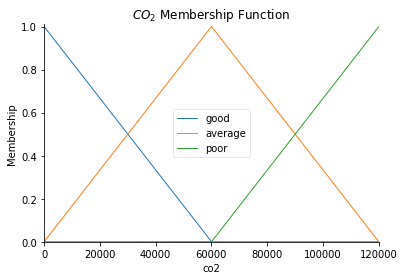

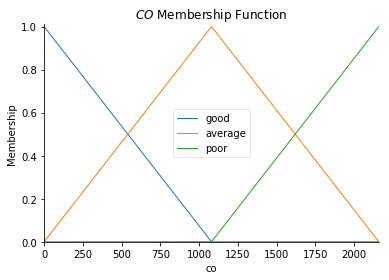

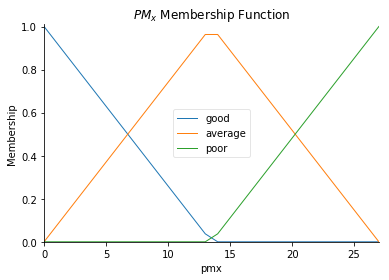

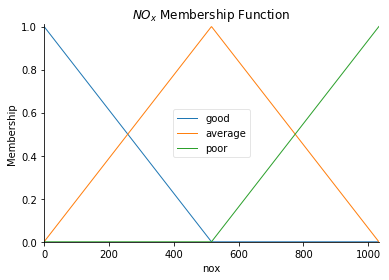

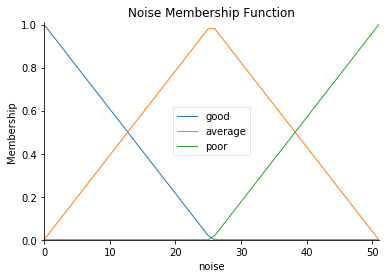

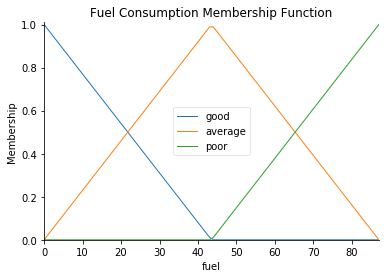

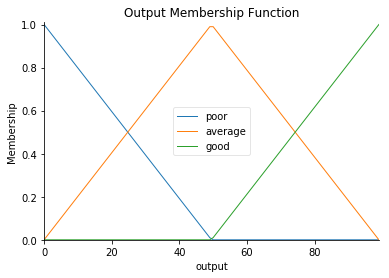

In [9]:
filenames = ['co2_mf.png','co_mf.png', 'pmx_mf.png', 'nox_mf.png','noise_mf.png', 'fuel_mf.png','output_mf.png']
titles = ['$CO_2$ Membership Function', '$CO$ Membership Function',
          '$PM_x$ Membership Function','$NO_x$ Membership Function',
          'Noise Membership Function','Fuel Consumption Membership Function', 'Output Membership Function']

for i, mf in enumerate([co2, co, pmx, nox, noise, fuel, output]):
    mf.view()
    plt.title(titles[i])
    plt.savefig(filenames[i], dpi=300)
    plt.show()

In [10]:
def permutation(lst): 
  
    # If lst is empty then there are no permutations 
    if len(lst) == 0: 
        return [] 
  
    # If there is only one element in lst then, only 
    # one permuatation is possible 
    if len(lst) == 1: 
        return [lst] 
  
    # Find the permutations for lst if there are 
    # more than 1 characters 
  
    l = [] # empty list that will store current permutation 
  
    # Iterate the input(lst) and calculate the permutation 
    for i in range(len(lst)): 
       m = lst[i] 
  
       # Extract lst[i] or m from the list.  remLst is 
       # remaining list 
       remLst = lst[:i] + lst[i+1:] 
  
       # Generating all permutations where m is first 
       # element 
       for p in permutation(remLst): 
           l.append([m] + p) 
    return l 

In [11]:
rule_combos = [['poor', 'average', 'good'] for _ in range(7)]

In [12]:
from itertools import product

In [13]:
r = [','.join(str(y) for y in x) for x in product(*rule_combos)]

In [14]:
rule_df = pd.DataFrame(index=range(len(r)), columns=['c02', 'co', 'pmx', 'nox', 'noise', 'fuel', 'output'])

In [15]:
for index, rule in enumerate(r):
    rule_df.loc[index,:] = rule.split(',')

In [16]:
for index, row in rule_df.iterrows():
    if (row.value_counts()/row.shape[0]).max() >= 0.5:
        #print(row.value_counts().sort_values(ascending=False).index[0])
        rule_df.loc[index, 'output'] = row.value_counts().sort_values(ascending=False).index[0]

In [17]:
rule_df = rule_df.drop_duplicates()

In [18]:
rule_base = [ctrl.Rule(co2[row['c02']] 
                       & co[row['co']] 
                       & pmx[row['pmx']]
                       & nox[row['nox']] 
                       & noise[row['noise']] 
                       & fuel[row['fuel']], 
                       output[row['output']]) for index, row in rule_df.iterrows()]

In [19]:
rl_ctrl = ctrl.ControlSystem(rule_base)
evaluator = ctrl.ControlSystemSimulation(rl_ctrl)

In [20]:
m = t.mean()
evaluator.input['co2'] = m[96]
evaluator.input['co'] = m[97]
evaluator.input['pmx'] = m[99]
evaluator.input['nox'] = m[100]
evaluator.input['noise'] = m[101]
evaluator.input['fuel'] = m[102]
evaluator.compute()
#t.loc[index, 'eval'] = 
print(evaluator.output['output'])

82.27444407859389


In [21]:
m

96     113.837966
97       1.949432
99       0.021717
100      0.871816
101      0.048455
102      0.701661
dtype: float64

In [23]:
cPickle.dump(evaluator, open('../sumo_simulation/input/fis_v2.pkl', 'wb'))